In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [28]:
type(housing)

sklearn.utils._bunch.Bunch

In [29]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [30]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [31]:
df = pd.DataFrame(housing.data)

In [32]:
df['price'] = housing.target

In [33]:
df.head()

,0,1,2,3,4,5,6,7,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20640 non-null  float64
 1   1       20640 non-null  float64
 2   2       20640 non-null  float64
 3   3       20640 non-null  float64
 4   4       20640 non-null  float64
 5   5       20640 non-null  float64
 6   6       20640 non-null  float64
 7   7       20640 non-null  float64
 8   price   20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [35]:
df.describe()

,0,1,2,3,4,5,6,7,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [36]:
x = df.drop('price',axis = 1)
y = df['price']

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

In [38]:
x_train.shape[0]

14448

In [39]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [40]:
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [41]:
import pickle
with open('scalar.pkl','wb')as f:
  pickle.dump(scalar,f)

In [42]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [43]:
y_pred = reg.predict(x_test)

print(reg.coef_)
print(reg.intercept_)
print(reg.get_params())

[ 0.81884462  0.11960784 -0.26536928  0.31055045 -0.00264837 -0.04044386
 -0.9065125  -0.87588707]
2.065175163344405
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [44]:
y_pred

array([2.4569815 , 1.99760205, 2.29081182, ..., 2.24778256, 1.91939287,
       2.12754782])

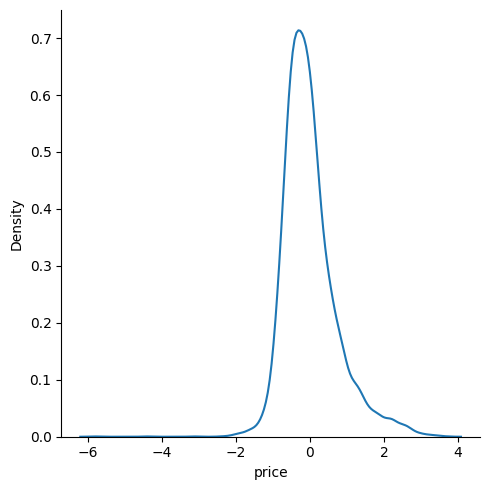

In [45]:
residual = y_test-y_pred
import seaborn as sns
sns.displot(residual,kind='kde')

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2e = r2_score(y_test, y_pred)
print(mse, mae, r2e)

0.5314494737169757 0.5344154915144822 0.6033040298158681


In [47]:
def adjusted_r2():
  val = 1-(1-r2e)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
  return val

adjusted_r2()

0.6030842384340914

In [48]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators= 100, random_state= 42)
rf_reg.fit(x_train, y_train)
y_pred_rfr = rf_reg.predict(x_test)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
print(mse_rfr)

0.2539514190551287


In [49]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, random_state= 42)
gbr.fit(x_train, y_train)
y_pred_gbr = gbr.predict(x_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print(mse_gbr)

0.27799849807572385


In [50]:
rf_reg.predict(x_test[15,].reshape(1,-1))

array([1.48106])

### GraidentBoostRegressor is found to be the best model where mean_squared_error of 0.25 with fast response so it is choosen for regression line on california_housing dataset.

In [51]:
with open('gbr.pkl', 'wb') as f:
  pickle.dump(gbr,f)

In [52]:
with open('gbr.pkl','rb') as p:
  model = pickle.load(p)

In [53]:
model.predict(x_test[15,].reshape(1,-1))

array([1.86869263])

# The pickle file is working fine.